In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import locale
from datetime import datetime
import warnings
warnings.simplefilter("ignore")#, UserWarning
import datetime

https://github.com/aws/amazon-sagemaker-examples/blob/master/introduction_to_amazon_algorithms/deepar_synthetic/deepar_synthetic.ipynb

In [2]:
from fbprophet import Prophet

In [3]:
from pandas import to_datetime

https://blog.engineering.publicissapient.fr/2020/04/01/lanalyse-de-series-temporelles-avec-prophet-et-deepar/

https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [4]:
Na=['DS','Y']
Type ={'Y': float}#,dtype=Type
dfSimu=pd.read_csv('Data/Simulate/SimulatedSta.csv')

In [5]:
#dfSimu['DS']=dfSimu.index
dfSimu.columns=['ds','y']

In [6]:
dfSimu['ds']= to_datetime(dfSimu['ds'])

In [7]:
dfSimu = dfSimu.astype({"ds": 'datetime64[ns]',"y": float})

In [8]:
dfSimu

,ds,y
0,2018-01-01 23:10:00,0.019999
1,2018-01-01 23:15:00,-0.045434
2,2018-01-01 23:20:00,-0.110673
3,2018-01-01 23:25:00,-0.175437
4,2018-01-01 23:30:00,-0.239450
...,...,...
1435,2018-01-06 22:45:00,0.340313
1436,2018-01-06 22:50:00,0.278085
1437,2018-01-06 22:55:00,0.214666
1438,2018-01-06 23:00:00,0.150328


In [9]:
dfSimu['y'].plot()

<AxesSubplot:>

In [10]:
m = Prophet()#yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=False)daily_seasonality=True

In [11]:
m.fit(dfSimu)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [12]:
from datetime import timedelta
from datetime import datetime, date, time, timezone
dt = datetime.strptime("21/11/06 16:30:20", "%d/%m/%y %H:%M:%S")#
delta = timedelta(seconds=300,hours=0,weeks=0)
dt+delta

datetime.datetime(2006, 11, 21, 16, 35, 20)

In [13]:
# define the period for which we want a prediction
date = datetime.strptime("18/01/06 23:05:00", "%y/%m/%d %H:%M:%S")#
from datetime import timedelta
future = list()
for i in range(1, 1000):
    #delta = timedelta(seconds=300,hours=0,weeks=0)
    date = date+timedelta(seconds=300,hours=0,weeks=0)#'2019-%02d' % i #'2018-01-06 23:05:00'#
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
future

,ds
0,2018-01-06 23:10:00
1,2018-01-06 23:15:00
2,2018-01-06 23:20:00
3,2018-01-06 23:25:00
4,2018-01-06 23:30:00
...,...
994,2018-01-10 10:00:00
995,2018-01-10 10:05:00
996,2018-01-10 10:10:00
997,2018-01-10 10:15:00


                   ds      yhat  yhat_lower  yhat_upper
0 2018-01-06 23:10:00  0.019992    0.019857    0.020127
1 2018-01-06 23:15:00 -0.045440   -0.045567   -0.045316
2 2018-01-06 23:20:00 -0.110678   -0.110808   -0.110539
3 2018-01-06 23:25:00 -0.175443   -0.175579   -0.175313
4 2018-01-06 23:30:00 -0.239455   -0.239590   -0.239330


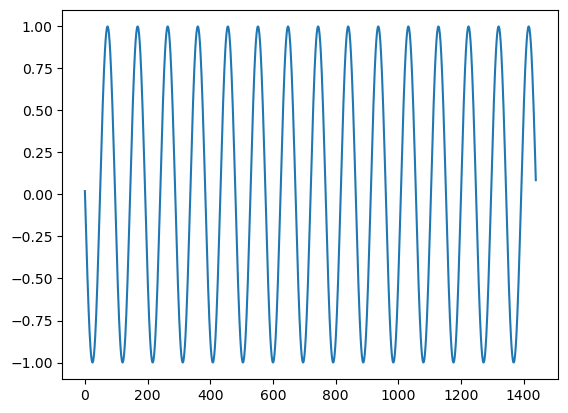

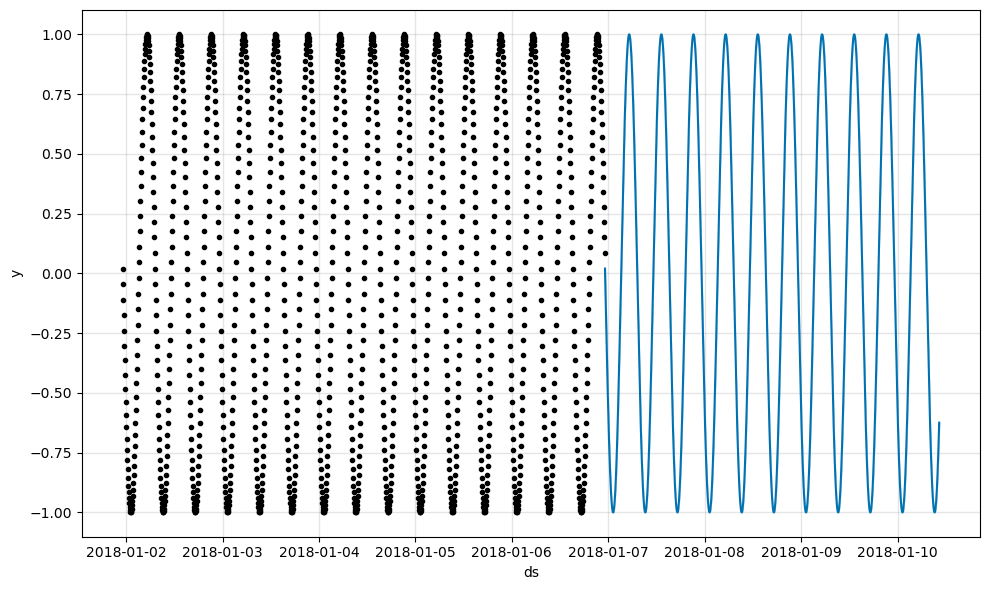

In [14]:

# use the model to make a forecast
forecast = m.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
m.plot(forecast)
plt.show()

In [15]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

                   ds      yhat  yhat_lower  yhat_upper
0 2018-01-06 23:10:00  0.019992    0.019857    0.020127
1 2018-01-06 23:15:00 -0.045440   -0.045567   -0.045316
2 2018-01-06 23:20:00 -0.110678   -0.110808   -0.110539
3 2018-01-06 23:25:00 -0.175443   -0.175579   -0.175313
4 2018-01-06 23:30:00 -0.239455   -0.239590   -0.239330


                   ds      yhat  yhat_lower  yhat_upper
0 2018-01-06 23:10:00  0.019992    0.019857    0.020127
1 2018-01-06 23:15:00 -0.045440   -0.045567   -0.045316
2 2018-01-06 23:20:00 -0.110678   -0.110808   -0.110539
3 2018-01-06 23:25:00 -0.175443   -0.175579   -0.175313
4 2018-01-06 23:30:00 -0.239455   -0.239590   -0.239330


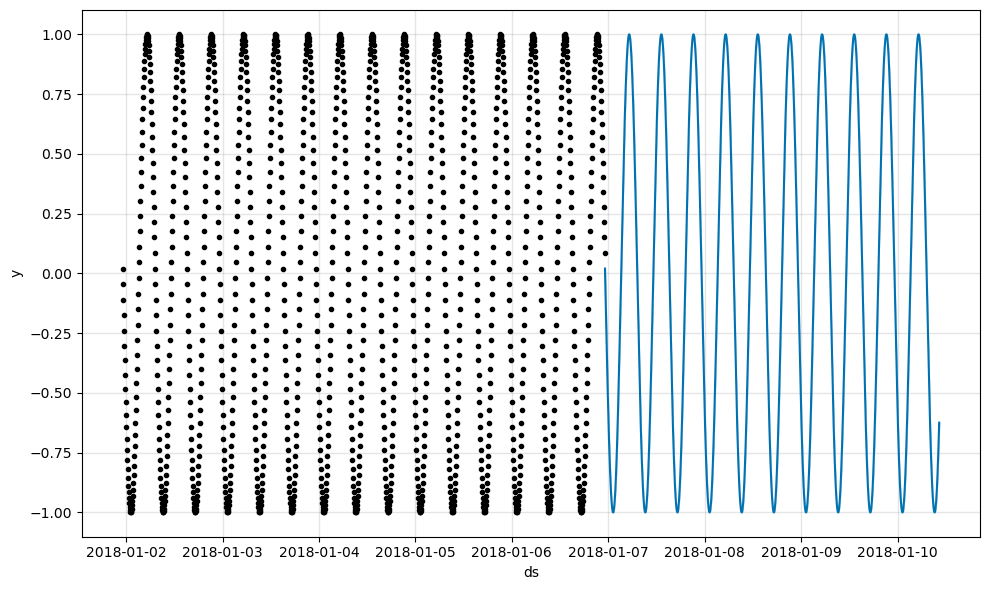

In [16]:

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
m.plot(forecast)
plt.show()